In [168]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [169]:
#Orders count per month
data = pd.read_csv('digikala-orders.csv')
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [170]:
data['DateTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'])

data['MonthYear_CartFinalize'] = data['DateTime_CartFinalize'].map(lambda data : 100*data.year + data.month)

data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,MonthYear_CartFinalize
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605


In [171]:
data_year_month =data.groupby(['MonthYear_CartFinalize'])['ID_Order'].count().reset_index()

data_year_month.head()

,MonthYear_CartFinalize,ID_Order
0,201309,6
1,201310,73
2,201311,90
3,201312,116
4,201401,141


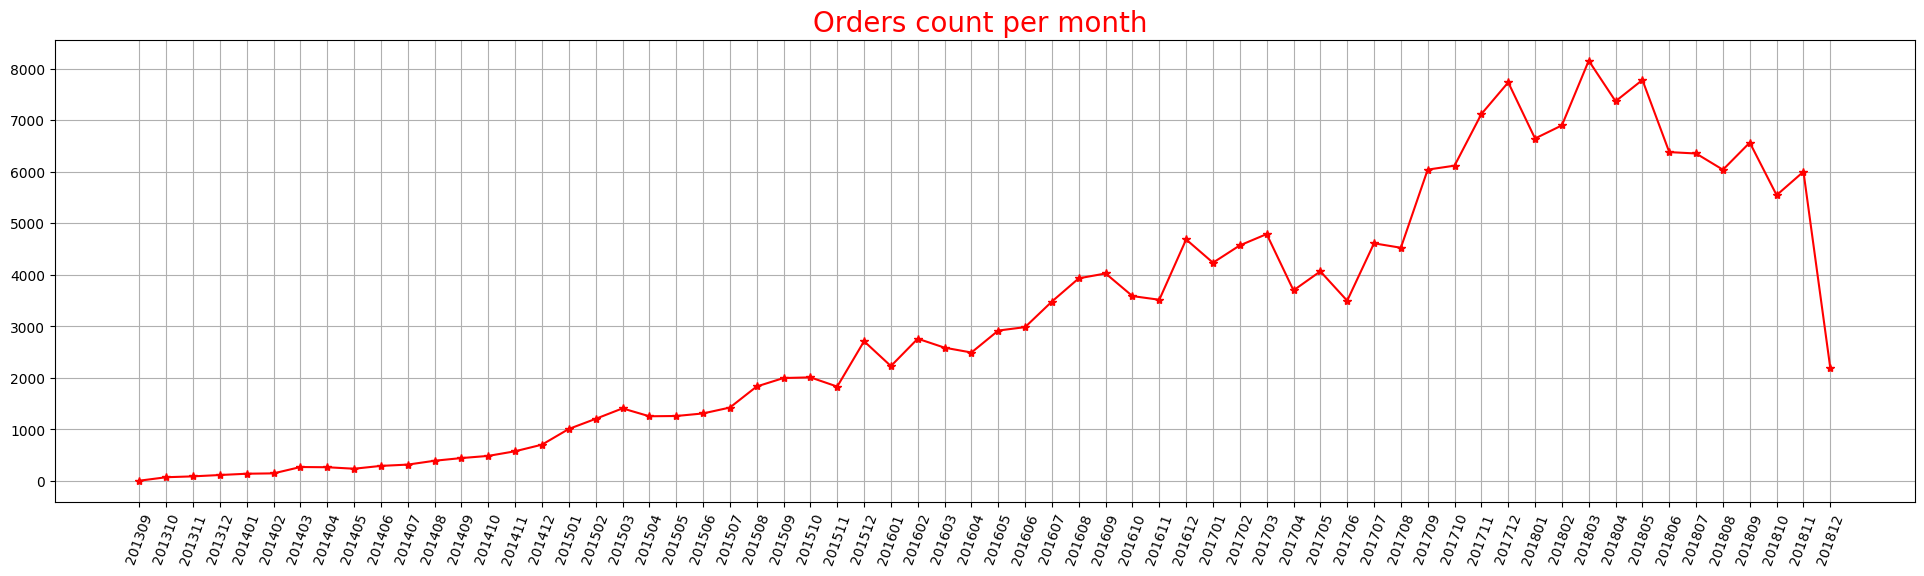

<Figure size 640x480 with 0 Axes>

In [172]:
plt.figure(figsize=(24,6))
plt.plot(data_year_month['MonthYear_CartFinalize'].to_numpy(dtype=(str)) , data_year_month['ID_Order'] , marker ='*' , color='red')
plt.xticks(rotation=70)
plt.grid()
plt.title("Orders count per month " , color='red' , fontsize=20)
plt.show()
plt.savefig("plot1.png")

In [173]:
#Customers count per city
data_city = data.groupby(data['city_name_fa'])['ID_Customer'].nunique().reset_index()

data_city.head(10)

,city_name_fa,ID_Customer
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2
5,آبدانان,37
6,آبسرد,8
7,آبش احمد,3
8,آبعلی,2
9,آبپخش,17


In [174]:
#The number of customer orders in eight cities  = x_8
x_8 = data_city.sort_values('ID_Customer' , ascending=False )[:8]
count_others = data_city.sort_values('ID_Customer' , ascending=False)[8:]['ID_Customer'].sum()

#others
x_8.loc[len(x_8)]=['others' , count_others ]

x_8.head(10)

,city_name_fa,ID_Customer
215,تهران,81048
815,کرج,4758
654,مشهد,4674
76,اصفهان,4664
97,اهواز,3353
505,شیراز,3076
355,رشت,2414
202,تبریز,2075
8,others,47647


In [175]:
#pie
from bidi.algorithm import get_display
from arabic_reshaper import reshape
persian_label= [get_display(reshape(label) for label in x_8['city_name_fa']).to_numpy(dtype=(str))]
plt.figure(figsize=(12,12))

plt.pie(x_8['ID_Customer'] , labels = persian_label , autopct='%1.1f%%')
plt.saving("plot2.png")

AttributeError: 'generator' object has no attribute 'decode'